In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-41jcj73b because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
 Z = [1., 1., 2., 2., 4., 6., 13., 26., 29., 79.] #Z's
 A = [1., 2., 3., 4., 9., 12., 27., 56., 64., 197.] #A's
 RL = [61.28, 122.60, 71.07, 94.32, 65.190, 42.7 , 24.01, 13.84, 12.86, 6.461] #R.L.s in g/cm^2.
 RESOL = [0.00, 0.14, 0.10, 0.16, 0.10, 0.25, 0.25, 0.25, 0.10, 0.25] #RESOL's
 EPS = [0.00000, 0.00225, 0.00550, 0.02000, 0.01680, 0.01600, 0.00830, 0.01000, 0.01000, 0.00580] #EPS
 f0 = [0.005600000, 0.009041522, 0.005309442, 0.004019733, 0.003481430, 0.003182231, 0.003278300, 0.002890000, 0.002874028, 0.002642450] #f0
 bigB = [0.000000000, 0.000852160, 0.002184287, 0.001344870, 0.001160846, 0.001359112, 0.001347400, 0.001401600, 0.000886615, 0.000763160] #bigB
 ag = [0.000000000, 0.007727217, 0.002886368, 0.002698622, 0.003119511, 0.003026540, 0.002969800, 0.003180200, 0.003095860, 0.003065390] #ag
 bg = [0.000000000, 0.009393734, 0.010349199, 0.007494100, 0.007839768, 0.007050467, 0.006576000, 0.007263500, 0.007094475, 0.006767755] #bg
 alpha1 = [20.0000000, 45.3840728, 64.2472201, 100.2558153, 110.9667410, 137.2846050, 131.8450000, 165.7000000, 132.4576661, 132.4516556] #alpha1
 j_fac = [0.000, 0.000, 2.500, 1.750, 0.000, 2.500, 0.000, 3.000, 3.000, 4.000] #j_fac
 tc_const = [2.000, 2.000, 2.000, 2.000, 2.000, 2.000, 2.000, 2.000, 2.000, 2.000] #tc_const
 tc_xlow = [1.200, 1.000, 1.400, 1.200, 1.400, 1.400, 1.400, 1.200, 1.200, 1.200] #tc_xlow
 tc_xhigh = [1.250, 1.050, 1.600, 1.400, 1.600, 1.600, 1.600, 1.400, 1.400, 1.400] #tc_xhigh
 tc_aa = [1.000000000, 1.728160251, 0.552199789, 0.682462283, 0.674455752, 0.840262866, 1.000000000, 1.006754067, 1.006754067, 0.981274820] #tc_aa
 tc_bb = [0.000000000, 2.531142539, 0.800000000, 0.466102124, 0.463011919, 0.222436835, 0.000000000, 0.041323394, 0.041323394, 0.066733756] #tc_bb
 tc_cc = [0.000000000,-2.725050671, 0.068648804, 0.015636955, 0.012525262, 0.007692703, 0.000000000, 0.004470165, 0.004470165, 0.004488926] #tc_cc
 tc_dd = [0.000000000,-1.586370910,-0.320972193,-0.122243059,-0.101843839,-0.060282702, 0.000000000,-0.030363598,-0.030363598,-0.033446059] #tc_dd
 tc_ee = [0.000000000,-16.39729007, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000] #tc_ee
 tc_ff = [0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000] #tc_ff
 emc_xlow = [0.800000000, 0.800000000, 0.800000000, 0.800000000, 0.800000000, 0.800000000, 0.800000000, 0.800000000, 0.800000000, 0.800000000] #emc_xlow
emc_xhigh = [0.900000000, 0.900000000, 0.900000000, 0.900000000, 0.900000000, 0.900000000, 0.900000000, 0.900000000, 0.900000000, 0.900000000] #emc_xhigh
emc_0 = [1.00 , 0.98835 , 1.31789 , 1.36112 , 1.52438 , 1.42308 , 1.29636 , 1.00 , 1.4118 , 1.32738 ]
emc_1 = [0.00 , 0.15439 , -2.47197 , -3.4133 , -3.26366 , -2.65087, -1.70678, 0.00 , -0.4174 , 2.06855 ]
emc_2 = [0.00 , -0.3495 , 12.0374 , 15.67047 , 13.78482 , 11.41047, 6.49121 , 0.00 , -0.41459 , -13.01543]
emc_3 = [0.00 , 0.34427 ,-26.33859 ,-32.79506 ,-26.95815 ,-22.54747,-11.52374, 0.00 , 5.0717 , 33.54028 ]
emc_4 = [0.00 , -0.02874, 25.66942 , 31.50846 , 22.72433 , 18.47078, 6.0731 , 0.00 , -13.84335, -45.36383]
emc_5 = [0.00 , -0.04936, -9.14186 , -11.52059, -6.66419 , -5.07537, 0.48219 , 0.00 , 9.81772 , 23.48632 ]
dhx_xlow = [0.900 , 0.900 , 0.900 , 0.900 , 0.900 , 0.900 , 0.900 , 0.900 , 0.900 , 0.900 ] #dhx_xlow
dhx_xhigh = [0.950 , 0.950 , 0.950 , 0.950 , 0.950 , 0.950 , 0.950 , 0.950 , 0.950 , 0.950 ] #dhx_xhigh
dhx_cor_min = [0.400 , 0.400 , 0.400 , 0.400 , 0.400 , 0.400 , 0.400 , 0.400 , 0.400 , 0.400 ] #dhx_cor_min
dhx_cor0 = [1.0000 , 4.10442 , 5.74758 , 2.63272 , 2.664662907, 2.2087 , 1.0000 , 2.481748722, 2.481748722, 2.257896906] #dhx_cor_0
dhx_cor1 = [0.0000 , -3.30482 , -4.80303 , -1.78944 , -1.75496311, -1.29213 , 0.000000000, -1.65829143, -1.65829143, -1.42430013] #dhx_cor_1
dhx_cor_xalt = [0.000000000, 0.000000000, 1.150000 , 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000] #dhx_cor_xalt
dhx_cor_alt_val = [0.000000000, 0.000000000, 0.500000 , 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000, 0.000000000] #dhx_cor_alt_val

Text(0, 0.5, 'alpha1')

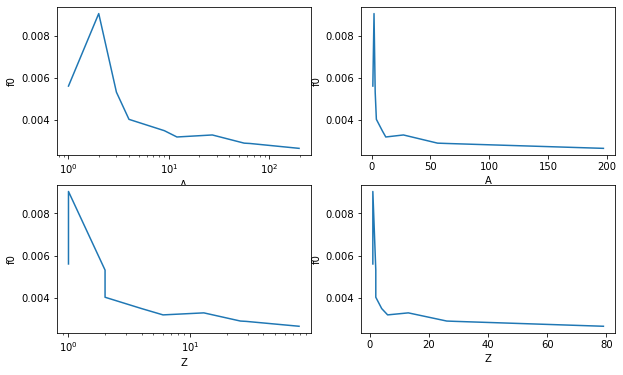

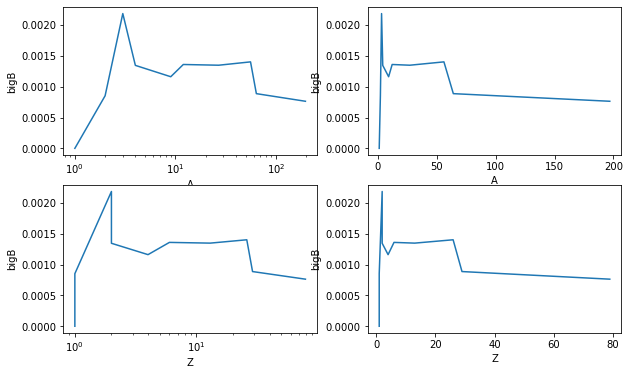

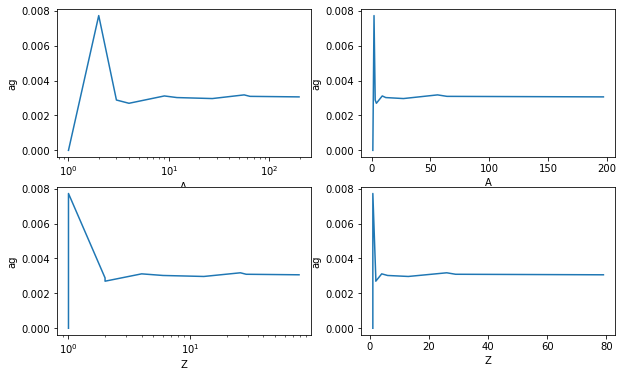

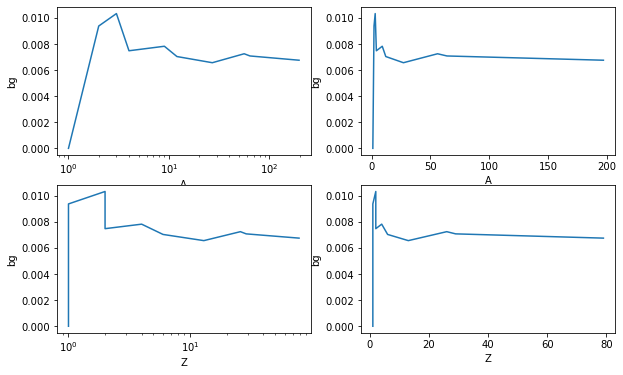

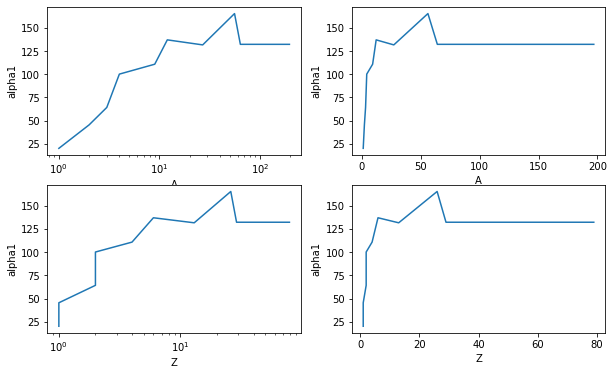

In [30]:
fig, ax1 = plt.subplots(2,2,figsize=(10, 6))
ax1[0][0].semilogx(A,f0)
ax1[0][0].set_xlabel('A')
ax1[0][0].set_ylabel('f0')
ax1[0][1].plot(A,f0)
ax1[0][1].set_xlabel('A')
ax1[0][1].set_ylabel('f0')
ax1[1][0].semilogx(Z,f0)
ax1[1][0].set_xlabel('Z')
ax1[1][0].set_ylabel('f0')
ax1[1][1].plot(Z,f0)
ax1[1][1].set_xlabel('Z')
ax1[1][1].set_ylabel('f0')
fig, ax2 = plt.subplots(2,2,figsize=(10, 6))
ax2[0][0].semilogx(A,bigB)
ax2[0][0].set_xlabel('A')
ax2[0][0].set_ylabel('bigB')
ax2[0][1].plot(A,bigB)
ax2[0][1].set_xlabel('A')
ax2[0][1].set_ylabel('bigB')
ax2[1][0].semilogx(Z,bigB)
ax2[1][0].set_xlabel('Z')
ax2[1][0].set_ylabel('bigB')
ax2[1][1].plot(Z,bigB)
ax2[1][1].set_xlabel('Z')
ax2[1][1].set_ylabel('bigB')
fig, ax3 = plt.subplots(2,2,figsize=(10, 6))
ax3[0][0].semilogx(A,ag)
ax3[0][0].set_xlabel('A')
ax3[0][0].set_ylabel('ag')
ax3[0][1].plot(A,ag)
ax3[0][1].set_xlabel('A')
ax3[0][1].set_ylabel('ag')
ax3[1][0].semilogx(Z,ag)
ax3[1][0].set_xlabel('Z')
ax3[1][0].set_ylabel('ag')
ax3[1][1].plot(Z,ag)
ax3[1][1].set_xlabel('Z')
ax3[1][1].set_ylabel('ag')
fig, ax4 = plt.subplots(2,2,figsize=(10, 6))
ax4[0][0].semilogx(A,bg)
ax4[0][0].set_xlabel('A')
ax4[0][0].set_ylabel('bg')
ax4[0][1].plot(A,bg)
ax4[0][1].set_xlabel('A')
ax4[0][1].set_ylabel('bg')
ax4[1][0].semilogx(Z,bg)
ax4[1][0].set_xlabel('Z')
ax4[1][0].set_ylabel('bg')
ax4[1][1].plot(Z,bg)
ax4[1][1].set_xlabel('Z')
ax4[1][1].set_ylabel('bg')
fig, ax5 = plt.subplots(2,2,figsize=(10, 6))
ax5[0][0].semilogx(A,alpha1)
ax5[0][0].set_xlabel('A')
ax5[0][0].set_ylabel('alpha1')
ax5[0][1].plot(A,alpha1)
ax5[0][1].set_xlabel('A')
ax5[0][1].set_ylabel('alpha1')
ax5[1][0].semilogx(Z,alpha1)
ax5[1][0].set_xlabel('Z')
ax5[1][0].set_ylabel('alpha1')
ax5[1][1].plot(Z,alpha1)
ax5[1][1].set_xlabel('Z')
ax5[1][1].set_ylabel('alpha1')